In [44]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [46]:
customers.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [47]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [48]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [49]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


Joint data

In [50]:
marketing_agg = marketing[marketing['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()
marketing_agg
transactions_agg = transactions.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})
customers.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)
joint_data = customers.join(engagement).join(transactions_agg).join(marketing_agg)
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0


### Data Cleaning and Preparation

In [51]:
customers['join_date'] = pd.to_datetime(customers['join_date'])
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

In [52]:
print(joint_data.isnull().sum())

join_date                     0
last_purchase_date            0
age                        1009
gender                      533
location                      0
number_of_site_visits         0
number_of_emails_opened       0
number_of_clicks              0
transaction_id                0
transaction_amount            0
campaign_id                2335
dtype: int64


In [53]:
# Fill missing values for gender with "Unknown"
joint_data['age'].fillna(joint_data['age'].mean(), inplace=True)
joint_data['gender'].fillna('Unknown', inplace=True)
joint_data['campaign_id'] = joint_data['campaign_id'].fillna(0)

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_23647/842433642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joint_data['age'].fillna(joint_data['age'].mean(), inplace=True)
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_23647/842433642.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [54]:
joint_data

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43.467467,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43.467467,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.000000,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,15524.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.000000,Female,Johnstonborough,119,47,16,10,5498.20,0.0
9997,2022-07-09,2023-01-25,26.000000,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.000000,Male,New John,53,17,5,3,3503.13,1.0


In [55]:
print(joint_data.isnull().sum())

join_date                  0
last_purchase_date         0
age                        0
gender                     0
location                   0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
transaction_id             0
transaction_amount         0
campaign_id                0
dtype: int64


### Featuring Engineering

In [56]:
# Convert date columns to datetime
joint_data['last_purchase_date'] = pd.to_datetime(joint_data['last_purchase_date'])
joint_data['join_date'] = pd.to_datetime(joint_data['join_date'])

#1.RFM Segmentation
# Define the reference date
reference_date = pd.to_datetime('2024-07-14')

# Calculate Recency (days since last purchase)
joint_data['recency'] = (reference_date - joint_data['last_purchase_date']).dt.days

# Calculate Frequency (number of purchases)
frequency = transactions.groupby('customer_id')['transaction_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']
joint_data = joint_data.merge(frequency, on='customer_id', how='left')

# Calculate Monetary (total amount spent)
monetary = transactions.groupby('customer_id')['transaction_amount'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']
joint_data = joint_data.merge(monetary, on='customer_id', how='left')

# This line divides the 'recency' column into 4 quantiles (or groups)
# assigns a label from 0 to 3 to each data point based on which quantile it falls into
joint_data['recency_quantile'] = pd.qcut(joint_data['recency'], q=4, labels=False)
joint_data['frequency_quantile'] = pd.qcut(joint_data['frequency'].rank(method='first'), q=4, labels=False)
joint_data['monetary_quantile'] = pd.qcut(joint_data['monetary'].rank(method='first'), q=4, labels=False)
joint_data['rfm_score'] = joint_data['recency_quantile'] + joint_data['frequency_quantile'] + joint_data['monetary_quantile']

# Seasonality
joint_data['last_purchase_month'] = joint_data['last_purchase_date'].dt.month
joint_data['last_purchase_quarter'] = joint_data['last_purchase_date'].dt.quarter

# Calculate Tenure
joint_data['tenure'] = (reference_date - joint_data['join_date']).dt.days
joint_data['tenure_in_months'] = joint_data['tenure'] / 30

# Calculate Average Purchase Value for each customer
joint_data['average_purchase_value'] = joint_data['monetary'] / joint_data['frequency']
joint_data['average_purchase_value'].fillna(0, inplace=True)

# Calculate Average Purchase Frequency Rate
joint_data['average_purchase_frequency'] = joint_data['frequency'] / joint_data['tenure_in_months']
joint_data['average_purchase_frequency'].fillna(0, inplace=True)

# Calculate Customer Value (monthly)
joint_data['customer_value'] = joint_data['average_purchase_value'] * joint_data['average_purchase_frequency']
joint_data['customer_value'].fillna(0, inplace=True)

# Calculate Average Customer Lifespan (in months)
average_customer_lifespan = joint_data['tenure_in_months'].mean()

# Calculate CLV for Each Customer
joint_data['clv'] = joint_data['customer_value'] * average_customer_lifespan

# Display the DataFrame with CLV for each customer
clv_df = joint_data[[ 'customer_id','number_of_site_visits','number_of_emails_opened','number_of_clicks','age','gender','recency','frequency', 'monetary', 'rfm_score', 'tenure', 'tenure_in_months', 'last_purchase_quarter', 'average_purchase_value', 'average_purchase_frequency', 'customer_value', 'clv']]

clv_df.head()

/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_23647/3343105281.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joint_data['average_purchase_value'].fillna(0, inplace=True)
/var/folders/tm/4mmt29_x6ds1fwnsphnp4_hh0000gn/T/ipykernel_23647/3343105281.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks,age,gender,recency,frequency,monetary,rfm_score,tenure,tenure_in_months,last_purchase_quarter,average_purchase_value,average_purchase_frequency,customer_value,clv
0,1,10,15,1,56.000000,Female,119,6,3509.48,0,237,7.900000,1,584.913333,0.759494,444.237975,12551.283541
1,2,285,49,51,43.467467,Male,263,9,6081.32,3,1040,34.666667,4,675.702222,0.259615,175.422692,4956.307376
2,3,192,73,25,43.467467,Unknown,595,6,1454.87,2,1139,37.966667,4,242.478333,0.158033,38.319666,1082.665205
3,4,110,30,17,29.000000,Male,682,20,7874.68,8,925,30.833333,3,393.734000,0.648649,255.395027,7215.806801
4,5,161,2,7,43.467467,Male,408,24,15524.55,8,902,30.066667,2,646.856250,0.798226,516.337583,14588.350790


### Model Building：Target:binary (0,1)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `joint_data` DataFrame is already defined and contains the necessary columns

# Define features and target variable
features = joint_data[['number_of_site_visits','number_of_emails_opened','number_of_clicks','age','frequency', 'monetary', 'rfm_score','last_purchase_quarter', 'average_purchase_value']]
# Define the target variable
target = joint_data['clv']  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 9)
X_test shape: (2000, 9)
y_train shape: (8000,)
y_test shape: (2000,)


<Axes: >

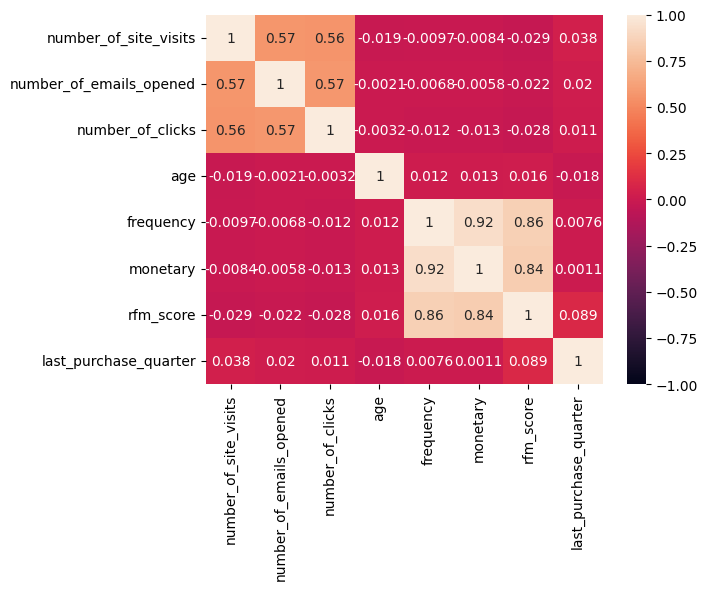

In [58]:
sns.heatmap(features.iloc[:,:8].corr(), annot=True, vmin=-1, vmax=1)

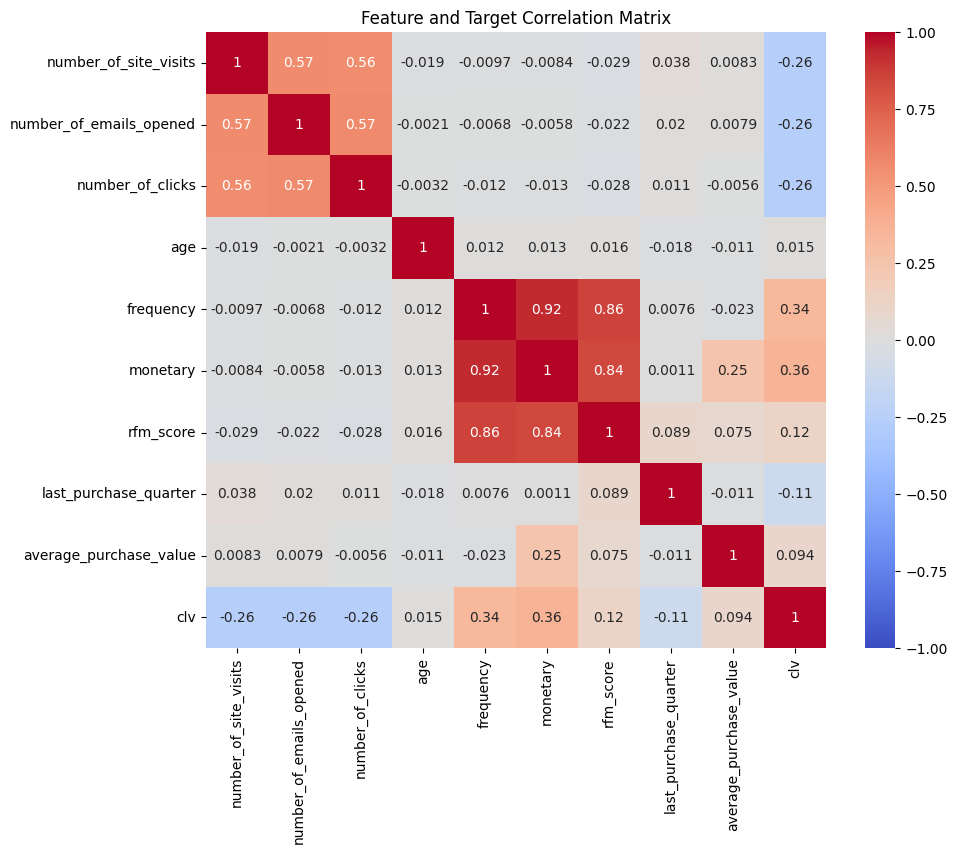

In [59]:
# Adding the target variable to the features dataframe
features_with_target = features.copy()
features_with_target['clv'] = target

plt.figure(figsize=(10, 8))
sns.heatmap(features_with_target.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Feature and Target Correlation Matrix')
plt.show()


In [60]:
joint_data['clv'].describe()

count     10000.000000
mean      14997.756791
std       24827.312510
min          15.828615
25%        3804.462588
50%        7689.511737
75%       14677.210331
max      364778.002760
Name: clv, dtype: float64

In [61]:
# Calculate the median CLV
median_clv = joint_data['clv'].median()
print(f"Median CLV: {median_clv}")
# Create a binary variable for high and low CLV
joint_data['clv_binary'] = (joint_data['clv'] > median_clv).astype(int)
# Display the first few rows to verify the new binary variable
print(joint_data[['customer_id', 'clv', 'clv_binary']].head())

Median CLV: 7689.511737050663
   customer_id           clv  clv_binary
0            1  12551.283541           1
1            2   4956.307376           0
2            3   1082.665205           0
3            4   7215.806801           0
4            5  14588.350790           1


In [62]:
features = joint_data[['frequency', 'monetary','number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'age','rfm_score', 'last_purchase_quarter', 'average_purchase_value']]
# Define the target variable
target = joint_data['clv_binary']

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Knn

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize the KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.771
Confusion Matrix:
[[724 277]
 [181 818]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1001
           1       0.75      0.82      0.78       999

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



### Logistic Model: Accuracy 0.89

Train the Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear', multi_class='ovr')

# Train the model
logistic_model.fit(X_train, y_train)


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

Evaluate the Model:

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')




Accuracy: 0.8955
Confusion Matrix:
[[898 103]
 [106 893]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1001
           1       0.90      0.89      0.90       999

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



### Naive Bayes


Pros:
• Easy and fast model to predict classes
• May perform better than other classifiers when assumption of independence holds true
• Performs well when we have categorical input variables


Cons:
• If a new category is introduced in the ‘test’ data that was not observed in training data, model cannot
make a prediction – smoothing technique would be required in this case
• In real life, it’s almost impossible to find independent predictors

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

In [68]:
# Identify categorical and numerical features
categorical_features = ['last_purchase_quarter']
numerical_features = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'age','rfm_score', 'average_purchase_value']

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


Accuracy: 0.712
Precision: 0.6656225528582616
Recall: 0.8508508508508509
F1 Score: 0.7469244288224957
Cross-validation Accuracy Scores: [0.731  0.7155 0.6895 0.7135 0.703 ]
Mean Cross-validation Accuracy: 0.7104999999999999


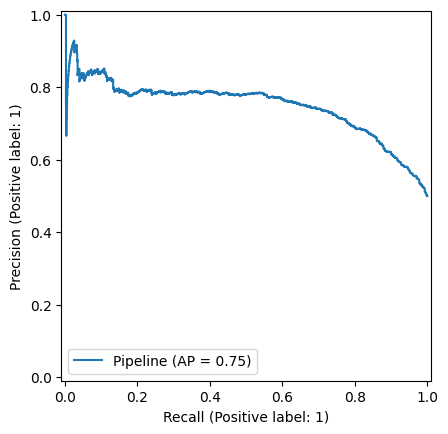

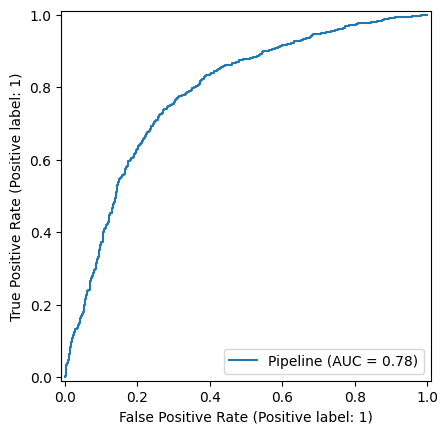

In [69]:
# Train the Naive Bayes model using the pipeline
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Cross-validation scores
cv_scores = cross_val_score(model_pipeline, features, target, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-validation Accuracy: {cv_scores.mean()}')

# Plot Precision-Recall curve
PrecisionRecallDisplay.from_estimator(model_pipeline, X_test, y_test)
plt.show()

# Plot ROC curve
RocCurveDisplay.from_estimator(model_pipeline, X_test, y_test)
plt.show()


### Decision Tree

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [71]:
# random_state=0 to have splits of features 
# the same the next time running
# make an instance of the model
joint_data_des = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 


In [72]:
joint_data_des.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.5302083333333333, 0.9285714285714286, 'monetary <= 7744.185\ngini = 0.5\nsamples = 8000\nvalue = [3999.0, 4001.0]\nclass = 1'),
 Text(0.26666666666666666, 0.7857142857142857, 'number_of_emails_opened <= 12.5\ngini = 0.364\nsamples = 4114\nvalue = [3130, 984]\nclass = 0'),
 Text(0.3984375, 0.8571428571428572, 'True  '),
 Text(0.13333333333333333, 0.6428571428571429, 'monetary <= 4218.91\ngini = 0.491\nsamples = 1503\nvalue = [850.0, 653.0]\nclass = 0'),
 Text(0.06666666666666667, 0.5, 'rfm_score <= 1.5\ngini = 0.392\nsamples = 796\nvalue = [583.0, 213.0]\nclass = 0'),
 Text(0.03333333333333333, 0.35714285714285715, 'monetary <= 1331.605\ngini = 0.5\nsamples = 363\nvalue = [178.0, 185.0]\nclass = 1'),
 Text(0.016666666666666666, 0.21428571428571427, 'number_of_site_visits <= 4.5\ngini = 0.258\nsamples = 125\nvalue = [106, 19]\nclass = 0'),
 Text(0.008333333333333333, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.025, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05, 0.214285714

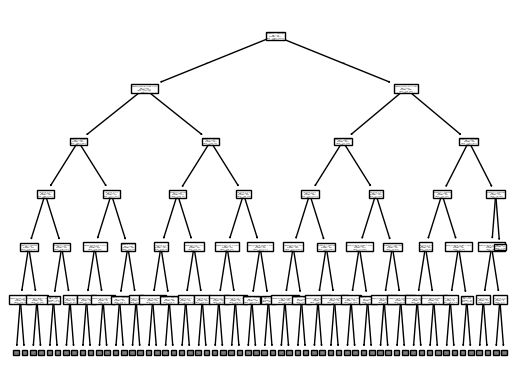

In [73]:
plot_tree(
    joint_data_des, 
    max_depth= 5, 
    feature_names = X_train.columns.tolist(), 
    class_names=['0', '1']
)

[Text(0.5, 0.875, 'monetary <= 7744.185\ngini = 0.5\nsamples = 8000\nvalue = [3999.0, 4001.0]\nclass = 1'),
 Text(0.25, 0.625, 'number_of_emails_opened <= 12.5\ngini = 0.364\nsamples = 4114\nvalue = [3130, 984]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'monetary <= 4218.91\ngini = 0.491\nsamples = 1503\nvalue = [850.0, 653.0]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'monetary <= 5012.24\ngini = 0.221\nsamples = 2611\nvalue = [2280, 331]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'number_of_site_visits <= 205.5\ngini = 0.347\nsamples = 3886\nvalue = [869, 3017]\nclass = 1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'monetary <= 11868.42\ngini = 0.283\nsamples = 3291\nvalue = [561, 2730]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'monetary <= 12432.895

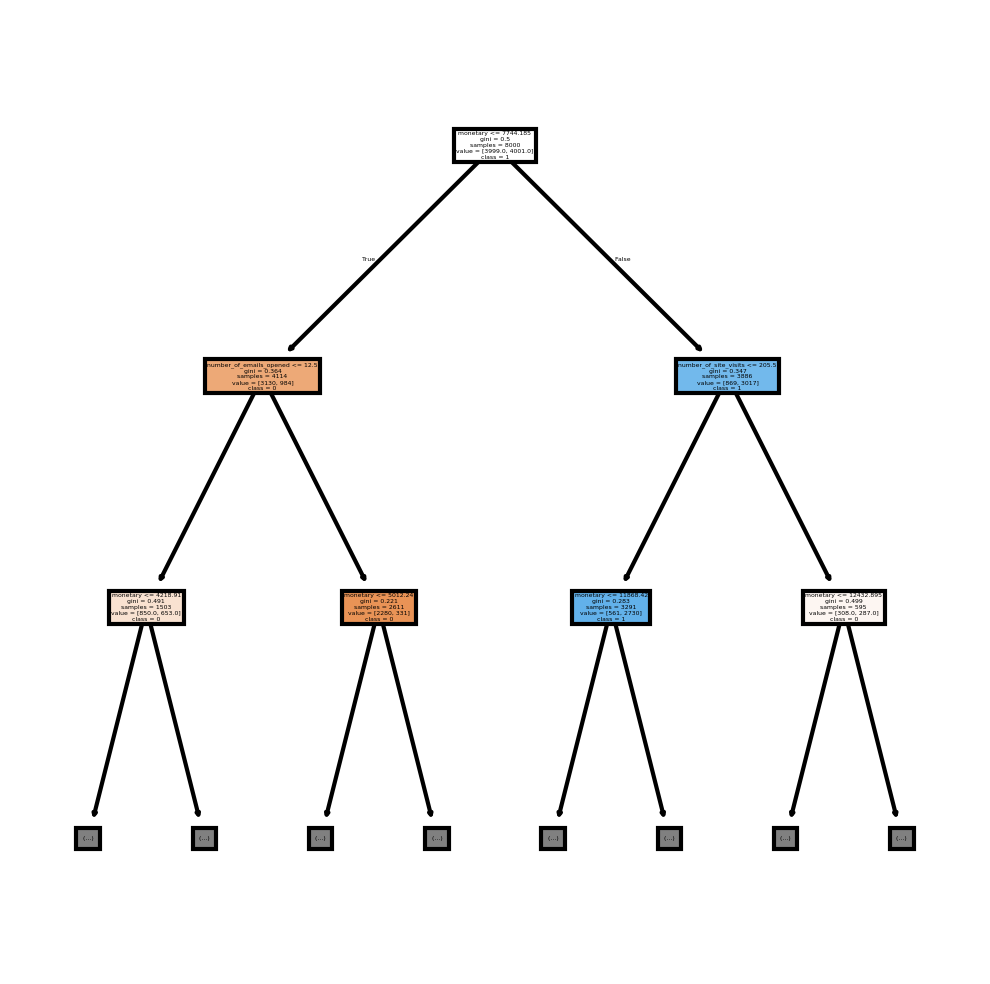

In [74]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    joint_data_des, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['0', '1'], 
    filled = True
    )

[Text(0.5, 0.875, 'monetary <= 7744.185\ngini = 0.5\nsamples = 8000\nvalue = [3999.0, 4001.0]\nclass = 1'),
 Text(0.25, 0.625, 'number_of_emails_opened <= 12.5\ngini = 0.364\nsamples = 4114\nvalue = [3130, 984]\nclass = 0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'monetary <= 4218.91\ngini = 0.491\nsamples = 1503\nvalue = [850.0, 653.0]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'monetary <= 5012.24\ngini = 0.221\nsamples = 2611\nvalue = [2280, 331]\nclass = 0'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'number_of_site_visits <= 205.5\ngini = 0.347\nsamples = 3886\nvalue = [869, 3017]\nclass = 1'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'monetary <= 11868.42\ngini = 0.283\nsamples = 3291\nvalue = [561, 2730]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'monetary <= 12432.895

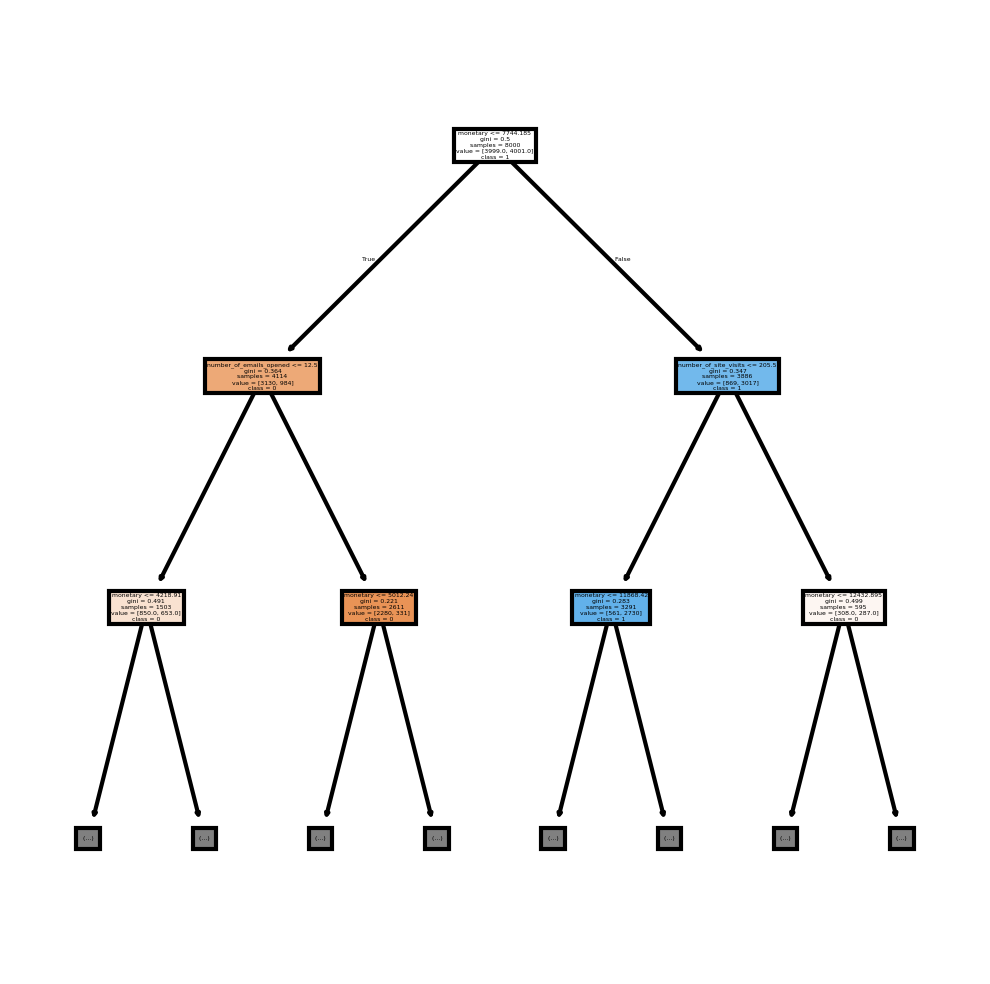

In [75]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (4,4), dpi=300
    )
plot_tree(
    joint_data_des, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['0', '1'], 
    filled = True
    )

In [76]:
pred = joint_data_des.predict(X_test)
pred[:5]
model = pd.DataFrame(confusion_matrix(y_test, pred), index=['0', '1'], columns=['0', '1'])
model.index.name = 'True'
model.columns.name = 'Predicted'
model

Predicted,0,1
True,,
0,866,135
1,102,897


In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1001
           1       0.87      0.90      0.88       999

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



### Model Evaluation

In [78]:
features = joint_data[['frequency', 'monetary','number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'age','rfm_score', 'last_purchase_quarter', 'average_purchase_value']]
# Define the target variable
target = joint_data['clv_binary']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [79]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB()
}



# Dictionary to store the evaluation results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision  Recall  F1 Score
K-Nearest Neighbors    0.7710   0.773542  0.7710  0.770482
Decision Tree          0.8700   0.870001  0.8700  0.870000
Logistic Regression    0.8910   0.891015  0.8910  0.890999
Naive Bayes            0.7745   0.774603  0.7745  0.774482


/Users/zhangyunan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Conclusion: Logistic Regression performs the best overall across all metrics, indicating it is the most reliable model for making accurate predictions.

Decision Tree performs well and is a good alternative to Logistic Regression, especially if model interpretability and ease of visualization are important.

 Naive Bayes has moderate performance and is slightly better than K-Nearest Neighbors. It could be considered if simplicity and speed are more critical than the highest accuracy.

  K-Nearest Neighbors has the lowest performance among the models. It might not be the best choice unless there are specific reasons to use this model.

### Business Impact Analysis

By predicting the CLV, EcomX aims to identify high-value customers and tailor personalized marketing efforts to retain them

 while also identifying low-value customers to manage resources effectively.

In [80]:
# Calculate the median CLV
median_clv = joint_data['clv'].median()
print(f"Median CLV: {median_clv}")
# Create a binary variable for high and low CLV
joint_data['clv_binary'] = (joint_data['clv'] > median_clv).astype(int)
# Display the first few rows to verify the new binary variable
print(joint_data[['customer_id', 'clv', 'clv_binary']].head())

Median CLV: 7689.511737050663
   customer_id           clv  clv_binary
0            1  12551.283541           1
1            2   4956.307376           0
2            3   1082.665205           0
3            4   7215.806801           0
4            5  14588.350790           1


In [85]:
# Filter high-value customers
high_value_customers = joint_data[joint_data['clv_binary'] == 1]
high_value_customers.head()



,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,...,rfm_score,last_purchase_month,last_purchase_quarter,tenure,tenure_in_months,average_purchase_value,average_purchase_frequency,customer_value,clv,clv_binary
0,1,2023-11-20,2024-03-17,56.000000,Female,North Shannonbury,10,15,1,6,...,0,3,1,237,7.900000,584.913333,0.759494,444.237975,12551.283541,1
4,5,2022-01-24,2023-06-02,43.467467,Male,East Matthewfort,161,2,7,24,...,8,6,2,902,30.066667,646.856250,0.798226,516.337583,14588.350790,1
5,6,2022-01-01,2023-02-10,55.000000,Female,North Richardfort,74,59,7,17,...,6,2,1,925,30.833333,603.202353,0.551351,332.576432,9396.452668,1
7,8,2023-02-09,2023-08-09,68.000000,Male,Marquezton,60,22,7,15,...,6,8,3,521,17.366667,780.708000,0.863724,674.315931,19051.794145,1
8,9,2022-01-24,2023-08-15,68.000000,Female,West Franciscobury,49,43,21,22,...,6,8,3,902,30.066667,471.952727,0.731707,345.331264,9756.821468,1


2. Business Impact Analysis: Engagement Metrics
By understanding how high-value customers engage with the website and marketing campaigns, EcomX Retailers can:

Improve the effectiveness of email and website marketing.

Increase conversion rates by enhancing customer engagement.

Analyze purchase history:Determine the most frequently purchased products and categories
Analyze engagement metrics:Study how high-value customers engage with the website and marketing campaigns.

Increased Revenue from Targeted Promotions:

Additional Revenue: $15,000 (15% increase in sales of top categories)


Increased Revenue from Improved Engagement:

Additional Revenue: $15,000 (15% increase in conversion rate)
Total Estimated Revenue Impact: $15,000+$15,000 =$25000


By leveraging insights from purchase history and engagement metrics, EcomX Retailers can increase its revenue by approximately $20,000 through targeted promotions and improved customer engagement strategies.

 Develop Strategies for Low-Value Customers

 Cost Reduction:

Reduce marketing spend on low-value customers.

Limit promotional offers and discounts to conserve resources.

Upselling and Cross-Selling:

Introduce low-value customers to higher-value products.
Use targeted promotions to encourage higher spending.

In [112]:
# Full business impact analysis code

# Analyze purchase history: Determine the most frequently purchased products and categories
purchase_summary = transactions[transactions['customer_id'].isin(high_value_customers.index)]
purchase_history = purchase_summary.groupby('product_category')['transaction_amount'].sum().sort_values(ascending=False)

# Display the purchase history
print("Purchase History (Top Product Categories):")
print(purchase_history)

# Estimate increase in sales
# A 15% increase in sales of the top 5 product categories due to targeted promotions.
# Current monthly sales for these categories is $100,000.
current_sales_top_categories = 100000
expected_increase_percentage = 0.15
additional_revenue = current_sales_top_categories * expected_increase_percentage

print(f"Additional Revenue from Targeted Promotions: ${additional_revenue}")

# Analyze engagement metrics: Study how high-value customers engage with the website and marketing campaigns.
engagement_summary = high_value_customers[['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']].mean()

# Display the engagement summary
print("Engagement Summary:")
print(engagement_summary)

# Estimate increase in revenue
# A 10% increase in conversion rate due to improved engagement.
# Current monthly revenue from high-value customers is $100,000.
current_monthly_revenue = 100000
expected_conversion_rate_increase = 0.10
additional_revenue_from_engagement = current_monthly_revenue * expected_conversion_rate_increase

print(f"Additional Revenue from Improved Engagement: ${additional_revenue_from_engagement}")

# Assume a 30% reduction in marketing spend on low-value customers
current_marketing_spend_low_value = 100000
reduced_spend_percentage = 0.30
cost_savings = current_marketing_spend_low_value * reduced_spend_percentage

print(f"Cost Savings from Reduced Spend on Low-Value Customers: ${cost_savings}")

# Total estimated revenue impact from high-value customer strategies
total_estimated_revenue_impact = additional_revenue + additional_revenue_from_engagement
print(f"Total Estimated Revenue Impact from High-Value Customer Strategies: ${total_estimated_revenue_impact}")

# Add cost savings from reduced spend on low-value customers
total_estimated_revenue_impact += cost_savings
print(f"Total Estimated Revenue Impact Including Cost Savings: ${total_estimated_revenue_impact}")


Purchase History (Top Product Categories):
product_category
Electronics    22458098.77
Home Goods     11022343.33
Clothing        5608661.58
Name: transaction_amount, dtype: float64
Additional Revenue from Targeted Promotions: $15000.0
Engagement Summary:
number_of_site_visits      66.7718
number_of_emails_opened    26.9526
number_of_clicks           13.2916
dtype: float64
Additional Revenue from Improved Engagement: $10000.0
Cost Savings from Reduced Spend on Low-Value Customers: $30000.0
Total Estimated Revenue Impact from High-Value Customer Strategies: $25000.0
Total Estimated Revenue Impact Including Cost Savings: $55000.0
